In [1]:
#for pandas
import pandas as pd

In [2]:
# for numpy
import numpy as np

In [3]:
#for loading .mat extension file into program
import scipy.io as sci

In [4]:
#for visualization purpose
import matplotlib.pyplot as plt

In [5]:
#function to calculate hypothesis function i.e. 1/1+exp(z)
def gz(z):
    hey=1+np.exp((-1)*z)
    heyt=1/hey
    return heyt

In [6]:
#function to compute cost
def compute_cost(theta1,theta2,x,y,m,lambo=0):
    cost=0
    for i in range(0,m):
        a2=gz(x[i,:].dot(np.transpose(theta1)))
        a2=np.append([1],a2)
        final=gz(a2.dot(np.transpose(theta2)))
        spider=((-1)*(y[i,:])*np.log(final))-((1-(y[i,:]))*np.log(1-final))
        cost=cost+np.sum(spider)
    cost=(1/m)*cost+(1/(2*m))*lambo*(np.sum(theta1*theta1)+np.sum(theta2*theta2))
    return cost

In [7]:
#function to calcuate gradient
def gz_gradient(z):
    venom=gz(z)
    return ((venom)*(1-venom))

In [8]:
#function to run forward propagation and return final (or 3rd) and secong layer activations of neural network
def forw_prop(theta1,theta2,x):
    a2=gz(x.dot(np.transpose(theta1)))
    a2=np.append([1],a2)
    final=gz(a2.dot(np.transpose(theta2)))
    return final,a2

In [9]:
#function to calculate graients of theta1 and theta 2 for backpropagation
def get_t1_t2_grad(theta1,theta2,x,y,m,lambo=0):
    bigdelta1=np.zeros(theta1.shape)
    bigdelta2=np.zeros(theta2.shape)
    for i in range(0,m):
      final,layer2=forw_prop(theta1,theta2,x[i,:])#getting final and second layer activations by forw_prop function
      smalldelta3=final-y[i,:]                     #error in 3rd layer
      smalldelta2=(smalldelta3.dot(theta2[:,1:26]))*gz_gradient(x[i,:].dot(np.transpose(theta1))) #error in 2nd layer
      bigdelta1=bigdelta1+np.outer(smalldelta2,x[i,:])
      bigdelta2=bigdelta2+np.outer(smalldelta3,layer2)
    theta1_gradient=(1/m)*bigdelta1+(lambo/m)*np.sum(theta1)
    theta2_gradient=(1/m)*bigdelta2+(lambo/m)*np.sum(theta2)
    return theta1_gradient,theta2_gradient

In [10]:
#data file location variable
datafileloc="C:/Users/RitKat/Desktop/Projects_Flash/Done using Python_Andrew_Ng_Coursera/Week 5/machine-learning-ex4/ex4/ex4data1.mat"

In [11]:
#load data from .mat extension file
#this feature is given by scipy lib
data=sci.loadmat(datafileloc)

In [12]:
#displaying data
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011', '__version__': '1.0', '__globals__': [], 'X': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'y': array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)}


In [13]:
#observe data type of this loaded data file is dictionary type
print(type(data))

<class 'dict'>


In [14]:
#finding key values of this dictionary type data file
for i in data:
  print(i)

__header__
__version__
__globals__
X
y


In [15]:
#extracting values under key X and putting it to training examples input and converting to numpy array type
x=np.array(data["X"])

In [16]:
#extracting values under key y and putting it to training examples output and converting to numpy array type
y=np.array(data["y"])

In [17]:
#printing training examples input
print(x)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
#printing training examples output
print(y)

[[10]
 [10]
 [10]
 ...
 [ 9]
 [ 9]
 [ 9]]


In [19]:
#coverting to dataframe object
x=pd.DataFrame(x)

In [20]:
print(type(x))

<class 'pandas.core.frame.DataFrame'>


In [21]:
#inserting extra column of only value 1 also callled biased input column
x.insert(0,"extra",np.ones(5000))

In [22]:
#converting to numpy array type
X=x.as_matrix()

In [23]:
#dimensions of input training examples viz. 'm' stands for number of training examples and 'n' stands for number of
# of features(including extra added biaed feature which has value 1 throughout)
[m,n]=X.shape
print([m,n])

[5000, 401]


In [24]:
print(type(X))

<class 'numpy.ndarray'>


In [25]:
#theta file location variable
thetafileloc="C:/Users/RitKat/Desktop/Projects_Flash/Done using Python_Andrew_Ng_Coursera/Week 5/machine-learning-ex4/ex4/ex4weights.mat"

In [26]:
#loading already trained theta set file
theta=sci.loadmat(thetafileloc)

In [27]:
#finding key values of this dictionary type theta file
for i in theta:
    print(i)

__header__
__version__
__globals__
Theta1
Theta2


In [28]:
#extracting theta 1 matrix from ex4weights.mat file as numpy array data type matrix
theta1=np.array(theta["Theta1"])

In [29]:
#extracting theta 2 matrix from ex4weights.mat file as numpy array data type matrix
theta2=np.array(theta["Theta2"])

In [30]:
#displaying dimensions of theta 1 and theta 2 learning parameters as extracted from .mat file
print(theta1.shape)
print(theta2.shape)

(25, 401)
(10, 26)


In [31]:
#now we will convert y, the output training examples to a different format and saving it to "Y"
#the places which contain "1" in y vector will be changed with[1,0,0,0,0,0,0,0,0,0] 
#the places which contain "2" in y vector will be changed with[0,1,0,0,0,0,0,0,0,0]
#                .
#                .
#                .
#                .
#the places which contain "10" in y vector will be changed with[0,0,0,0,0,0,0,0,0,1]

#remember here ->y=10 means y=0

In [32]:
#creating identity matrix
iden=np.eye(10)

In [33]:
print(iden)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [34]:
#assigning name to each row of the above construted identity matrix
hehe1=iden[0,:]
hehe2=iden[1,:]
hehe3=iden[2,:]
hehe4=iden[3,:]
hehe5=iden[4,:]
hehe6=iden[5,:]
hehe7=iden[6,:]
hehe8=iden[7,:]
hehe9=iden[8,:]
hehe10=iden[9,:]

In [35]:
#creting a matrix "Y" of dimension of 5000x10 to store modified y
Y=np.zeros((5000,10))

In [36]:
#converting y to Y
for i in range(0,5000):
    if y[i]==1:
      Y[i,:]=Y[i,:]+hehe1
    elif y[i]==2:
      Y[i,:]=Y[i,:]+hehe2
    elif y[i]==3:
      Y[i,:]=Y[i,:]+hehe3
    elif y[i]==4:
      Y[i,:]=Y[i,:]+hehe4
    elif y[i]==5:
      Y[i,:]=Y[i,:]+hehe5
    elif y[i]==6:
      Y[i,:]=Y[i,:]+hehe6
    elif y[i]==7:
      Y[i,:]=Y[i,:]+hehe7
    elif y[i]==8:
      Y[i,:]=Y[i,:]+hehe8
    elif y[i]==9:
      Y[i,:]=Y[i,:]+hehe9
    elif y[i]==10:
      Y[i,:]=Y[i,:]+hehe10
    

In [37]:
#now we compute cost with lambda=0,with already trained theta 1 and theta 2 sets
#lambda is regularization parameter
costj=compute_cost(theta1,theta2,X,Y,m)
print(costj)

0.2876291651613188


In [38]:
##now we compute cost with lambda=0,with already trained theta 1 and theta 2 sets
#lambda is regularization parameter
costj=compute_cost(theta1,theta2,X,Y,m,1)
print(costj)

0.38448779624289386


In [39]:
#now exercise part 2 begins which is road to Backpropagation

In [40]:
#just testing function gz_grad() as does it give values as instructed,i.e. as z=0 it must give 0.25
print(gz_gradient(0))

0.25


In [41]:
#just testing function gz_grad() as does it give values as instructed,i.e. at high z it must give 0
print(gz_gradient(1000000))

0.0


In [42]:
#now for learning backpropagation technique we assign random values to theta1(referred to as theta1_new) between -0.12 to 0.12
#there is no such significance of 0.12,just randomly choosen value
theta1_new=np.random.uniform(-0.12,0.12,size=(25,401))

In [43]:
#now for learning backpropagation technique we assign random values to theta2(referred to as theta2_new) between -0.12 to 0.12
#there is no such significance of 0.12,just randomly choosen value
theta2_new=np.random.uniform(-0.12,0.12,size=(10,26))

In [44]:
#displaying randomly generated theta1_new matrix
print(theta1_new)

[[-0.08067627  0.03986151 -0.02425883 ...  0.02147819  0.02981813
  -0.11353862]
 [-0.09106417 -0.06516081 -0.11943774 ... -0.0460462   0.01265768
   0.0488121 ]
 [ 0.03577534  0.05220311 -0.05863613 ... -0.04675064 -0.09383934
   0.08052843]
 ...
 [ 0.02740776  0.1054514  -0.06362471 ... -0.04407149 -0.01468194
  -0.11345777]
 [ 0.06165535  0.000528    0.02459953 ...  0.07436145 -0.11127317
   0.04672243]
 [-0.03202127 -0.03993267 -0.06060116 ...  0.04054862  0.10682294
  -0.02025509]]


In [45]:
#displaying randomly generated theta2_new matrix
print(theta2_new)

[[-0.08078304 -0.0079224   0.09601362 -0.06494121  0.09050887  0.07325077
  -0.07091635 -0.0364276   0.03762892  0.02117963  0.08840409 -0.10269658
   0.01773735 -0.07242488  0.09946494  0.10586425  0.04051986  0.0892233
   0.08173863 -0.02527419  0.03445215 -0.05780595 -0.07615809  0.07388811
  -0.02240873 -0.07097317]
 [ 0.06455044 -0.01972787 -0.09488433 -0.09212165 -0.05930546  0.05429063
  -0.00610177  0.08397634 -0.0658338   0.07520214 -0.05449338  0.03910308
  -0.10455123 -0.08538417  0.05925486  0.08529885  0.03228384  0.11428154
   0.03540355  0.0009266   0.05782996  0.02325887 -0.08049364 -0.00507481
   0.1152636   0.00989092]
 [ 0.03785975 -0.00049574 -0.0551773   0.06137436 -0.04458505 -0.01530886
   0.02600558 -0.11011436 -0.09888531 -0.03593701  0.03715215  0.05045109
   0.08669161 -0.09852098 -0.07987242 -0.07950582  0.03523456  0.11267043
  -0.09698241  0.11482462 -0.04500058 -0.09197055  0.01123404  0.05185091
   0.01378821 -0.10509877]
 [ 0.09304368  0.06551581  0.087

In [46]:
#trial run of function which generates gradients of theta1_new and theta2_new 
theta1_new_grad,theta2_new_grad=get_t1_t2_grad(theta1_new,theta2_new,X,Y,m,0)

In [47]:
#checking dimensions of generated matrix
print(theta1_new_grad.shape)
print(theta2_new_grad.shape)

(25, 401)
(10, 26)


In [48]:
#now we can perform gradient descent algorithm

In [49]:
#setting number of iterations to perform to 1000 at a learning rate of 0.01
iterations=400
alpha=0.01
ite=[i for i in range(0,iterations+1)]

In [50]:
#computing error value just before making 1st iteration of gradient descent with random values of theta1_new and theta2_new
J_val=[compute_cost(theta1_new,theta2_new,X,Y,m)]

In [51]:
#running gradient descent
for i in range(0,iterations):
    theta1_new_grad,theta2_new_grad=get_t1_t2_grad(theta1_new,theta2_new,X,Y,m,0)
    theta1_new=theta1_new-(alpha/m)*theta1_new_grad
    theta2_new=theta2_new-(alpha/m)*theta2_new_grad
    J_val.append(compute_cost(theta1_new,theta2_new,X,Y,m))

Text(200,6.95,'Observe the error is decreasing')

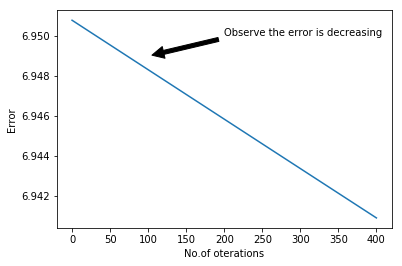

In [58]:
#plotting value of error with each step(iteration of gradient descent)
plt.plot(ite,np.array(J_val))
plt.xlabel("No.of oterations")
plt.ylabel("Error")
plt.annotate('Observe the error is decreasing',xy=(100, 6.949),xytext=(200, 6.950),arrowprops=dict(facecolor='black',shrink=0.05))

In [59]:
#we can make more iterations of gradient descent to even lower the error